# 1. Instalação da biblioteca

In [89]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


# 2. Modelos de classificação

## Exemplo usando o K-Nearest Neighbors para classificar flores

#### Os dados de entrada nesse dataset são o tamanho vertical e horizontal da pétala e da sépala e o dado de saída é qual espécie a flor é (versicolor, virginica ou setosa)

![title](img/iris.png)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregando o dataset e dividindo ele em conjuntos de teste e treino
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Criando o modelo e treinando com os dados de treino do dataset
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

# Tentando predizer o resultado dos dados de teste
y_pred = model.predict(x_test)

# Calculando o quao preciso o modelo foi em respeito aos dados de teste
accuracy = accuracy_score(y_test, y_pred)

print("A acurácia do modelo nos dados de teste foi de", accuracy)
df = pd.DataFrame(data={"saida_esperada": y_test, "saida_predita": y_pred})
df = df.replace(0, "versicolor").replace(1, "virginica").replace(2, "setosa")
df.head(11)

A acurácia do modelo nos dados de teste foi de 0.9777777777777777


,saida_esperada,saida_predita
0,versicolor,versicolor
1,virginica,virginica
2,virginica,virginica
3,versicolor,versicolor
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,setosa,setosa


# 3. Modelos de regressão

## Exemplo usando a Regressão Linear para prever progressão de diabetes

### Dados de entrada do dataset
* Idade (anos)
* Sexo
* Índice de massa corporal
* Pressão sanguínea média
* Número de células T (um tipo de glóbulos brancos)
* Concentracão de LDL no sangue
* Concentracão de HDL no sangue
* Concentracão de um hormônio estimulante tireodial
* Concentração de lamotrigina no sangue
* Concentração de glicose no sangue


### Dado de saída
Uma métrica quantitativa da progressão da doença depois de um ano de uma medição

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Carregando o dataset e dividindo ele em conjuntos de teste e treino
x, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Criando o modelo e treinando com os dados de treino do dataset
model = LinearRegression()
model.fit(x_train, y_train)

# Tentando predizer o resultado dos dados de teste
y_pred = model.predict(x_test)

# Calculando o qual o erro médio quadrático gerado pelo modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)

print("O erro médio quadrático do modelo nos dados de teste foi de", mse)

pd.DataFrame(data={"saida_esperada": y_test, "saida_predita": y_pred, "erro": np.abs(y_test-y_pred)}).head(11)

O erro médio quadrático do modelo nos dados de teste foi de 2827.0709606368036


,saida_esperada,saida_predita,erro
0,78.0,117.355414,39.355414
1,152.0,107.592023,44.407977
2,200.0,186.611796,13.388204
3,59.0,65.022861,6.022861
4,311.0,172.787435,138.212565
5,178.0,191.640003,13.640003
6,332.0,221.506525,110.493475
7,132.0,119.885757,12.114243
8,156.0,156.462967,0.462967
9,135.0,127.890388,7.109612


# 4. Redução de Dimensionalidade

## Exemplo usando o PCA para reduzir a dimensionalidade do dataset "Iris"

#### Os dados de entrada nesse dataset são o tamanho vertical e horizontal da pétala e da sépala e o dado de saída é qual espécie a flor é (versicolor, virginica ou setosa)

![title](img/iris.png)

Número de dimensões dos dados originais: 4
Número de dimensões dos dados após PCA: 2


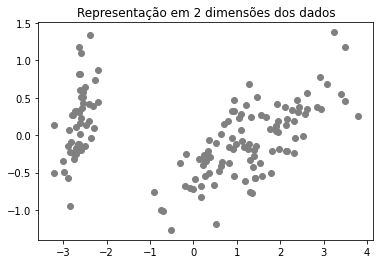

In [50]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

dataset = load_iris()
pca = PCA(n_components=2)
pcs = pca.fit_transform(dataset.data)

print("Número de dimensões dos dados originais:", dataset.data.shape[1])
print("Número de dimensões dos dados após PCA:", pcs.shape[1])

for pt in pcs:
    plt.scatter(pt[0], pt[1], color="gray")
    
plt.title("Representação em 2 dimensões dos dados")
plt.show()

# 5. Clusterização

## Exemplo usando o K-Means para clusterizar vinhos do mesmo tipo após redução de dimensionalidade

### Dados de entrada
* Quantidade de álcool
* Quantidade de ácido málico
* Quantidade de ash
* Alcalinidade do ash
* Quantidade de magnésio
* Quantidade de fenóis
* Quantidade de flavonoides
* Quantidade de fenóis não flavonoides
* Quantidade de proantocianidina
* Intensidade de cor
* Tonalidade
* OD280/OD315
* Quantidade de proline

### Dado de saída
Uma classe que corresponde a qual entre 3 tipos de vinhos uma dada instância faz parte

Número de dimensões iniciais: 13
Número de dimensões após PCA: 2


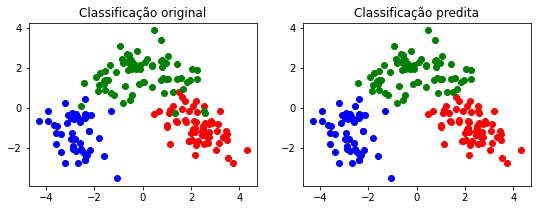

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Carregando o dataset
dataset = load_wine()

# Pre processando os dados do dataset via normalização
scaler = StandardScaler()
dataset.data = scaler.fit_transform(dataset.data)

# Reduzindo a dimensionalidade dos dados de entrada
print("Número de dimensões iniciais:", dataset.data.shape[1])
pcs = PCA(n_components=2).fit_transform(dataset.data)
print("Número de dimensões após PCA:", pcs.shape[1])

# Criando o modelo de clusterização e treinando-o com os dados
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(pcs)

# Gerando as predições para os dados
predicted_clusters = kmeans.predict(pcs)

# Plotando os resultaods
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
colors = ["r", "g", "b"]
for pt, cluster in zip(pcs, dataset.target):
    ax[0].scatter(pt[0], pt[1], color=colors[cluster])

for pt, cluster in zip(pcs, predicted_clusters):
    ax[1].scatter(pt[0], pt[1], color=colors[cluster])

ax[0].set_title("Classificação original")
ax[1].set_title("Classificação predita")
plt.show()

# Avaliação de modelos


## Exemplo de avaliação no modelo usado no exemplo de classificação

Métricas da tarefa de classificação:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89        18
           2       0.82      0.82      0.82        11

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45

Matriz de confusão:


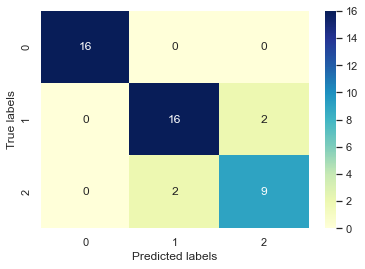

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

# Carregando o dataset e dividindo ele em conjuntos de teste e treino
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Criando o modelo e treinando com os dados de treino do dataset
model = KNeighborsClassifier(n_neighbors=50)
model.fit(x_train, y_train)

# Tentando predizer o resultado dos dados de teste
y_pred = model.predict(x_test)

print("Métricas da tarefa de classificação:\n")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()